## Load data.

In [1]:
import numpy as np
import os
import csv
import pickle
import matplotlib as mpl

from helper_functions import plot_scatter_and_fit, print_stats, plot_overview_2_subplots, plot_effects_2_subplots
from prepare_plot_data import get_sample_size_country

CWD = os.path.abspath("")  # Jupyter notebook path.
dir_dict = os.path.join(CWD, "dicts")  # Data to plot.
dir_output = os.path.join(CWD, "output")  # Folder to put figures in.
dir_npy = os.path.join(CWD, "npy")  # Data files needed for plotting figures.

# Set up plotting parameters.
font_kw = {"family": "arial", "weight": "normal", "size": "7"}  # Markers and such.
mpl.rc("font", **font_kw)

# Load data to plot.
USE_CAPS = False  # Don't capitalize country 2-letter codes (they are already all-caps).
BY = "Country"  # Used in figure file names.

with open(os.path.join(dir_dict, "country2power_distance.pkl"), "rb") as f:
    country2power_distance = pickle.load(f)
with open(os.path.join(dir_dict, "country2individualism.pkl"), "rb") as f:
    country2individualism = pickle.load(f)
with open(os.path.join(dir_dict, "country2men_ratio.pkl"), "rb") as f:
    country2men_ratio = pickle.load(f)

ratio_mat_rel = np.load(os.path.join(dir_npy, "ratio_mat_rel-country_effect.npy"))
countries_select = np.load(os.path.join(dir_npy, "groups-country_effect.npy"))
n_collab = get_sample_size_country(dir_dict)

## Make figures.

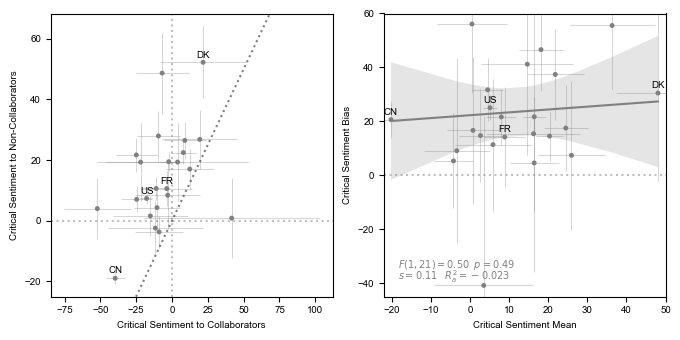

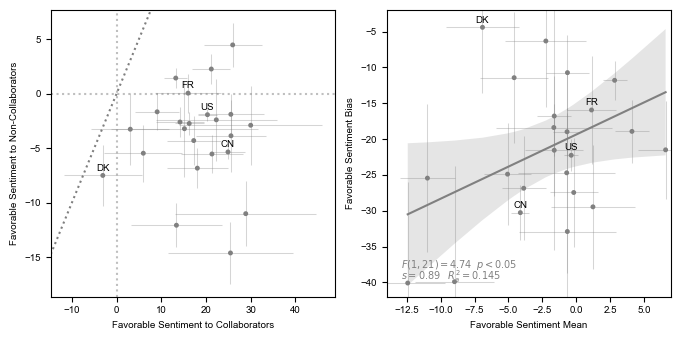

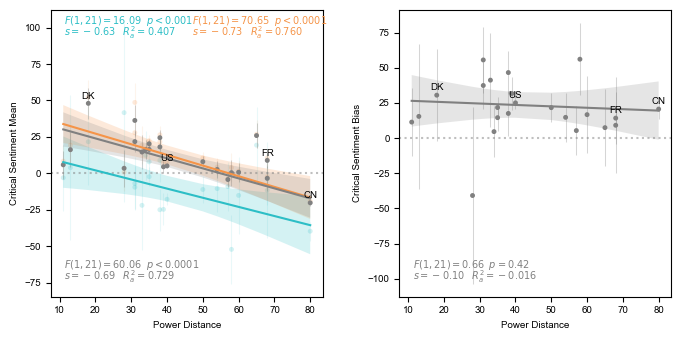

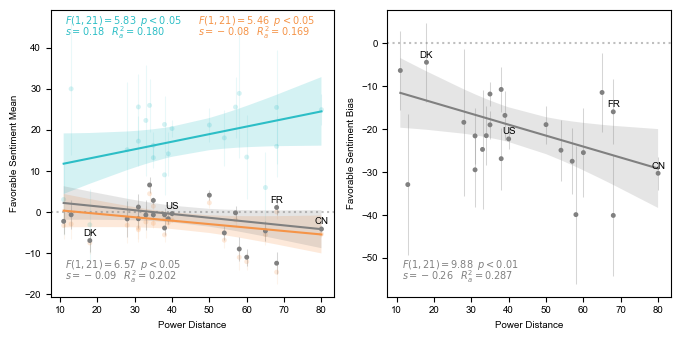

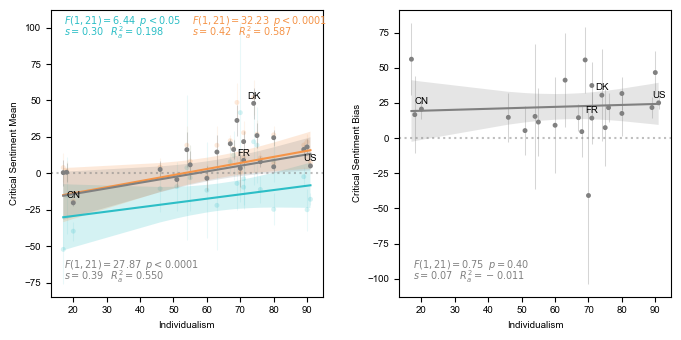

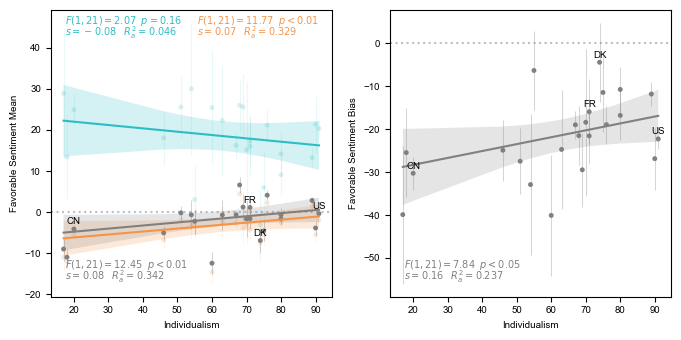

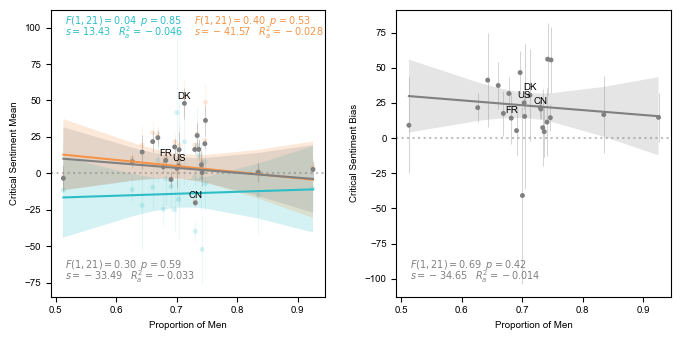

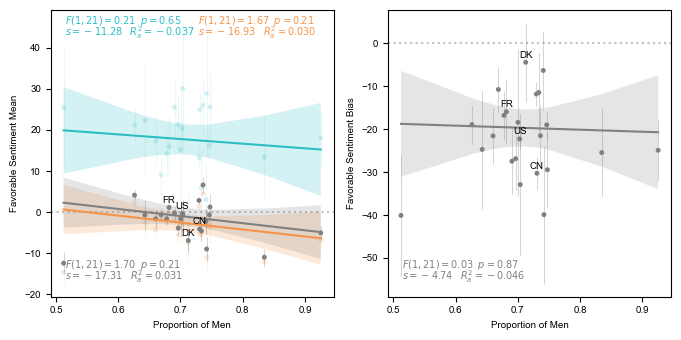

In [2]:
alpha_err = 0.33

# Groups to annotate on figures.
# grps_subset = np.array([k for k, v in n_collab.items() if v >= 1500])
grps_subset = ["DK", "US", "FR", "CN"]

xlims = [None, [-22, 50]]
ylims = [None, [-45, 60]]
# xlims, ylims = None, None
plot_overview_2_subplots(
    ratio_mat_rel, countries_select, grps_subset, dir_output, xlims, ylims, sent=-1, caps=USE_CAPS, alpha_err=alpha_err, by=BY
)  # Plot critical sentiment.

xlims = [None, [-14, 7]]
ylims = [None, [-42, -2]]
# xlims, ylims = None, None
plot_overview_2_subplots(
    ratio_mat_rel, countries_select, grps_subset, dir_output, xlims, ylims, sent=1, caps=USE_CAPS, alpha_err=alpha_err, by=BY
)  # Plot favorable sentiment.

x_factor = np.array([country2power_distance[c] for c in countries_select])
x_lab = "Power Distance"
ylims = [[-85, 65], [-45, 70]]
ylims = None
plot_effects_2_subplots(
    ratio_mat_rel, countries_select, grps_subset, x_factor, x_lab, dir_output, ylims, sent=-1, caps=USE_CAPS, alpha_err=alpha_err, by=BY
)  # Plot critical sentiment.

x_factor = np.array([country2power_distance[c] for c in countries_select])
x_lab = "Power Distance"
ylims = [[-20, 40], [-45, 5]]
ylims = None
plot_effects_2_subplots(
    ratio_mat_rel, countries_select, grps_subset, x_factor, x_lab, dir_output, ylims, sent=1, caps=USE_CAPS, alpha_err=alpha_err, by=BY
)  # Plot favorable sentiment.

x_factor = np.array([country2individualism[c] for c in countries_select])
x_lab = "Individualism"
ylims = [[-90, 70], [-50, 70]]
ylims = None
plot_effects_2_subplots(
    ratio_mat_rel, countries_select, grps_subset, x_factor, x_lab, dir_output, ylims, sent=-1, caps=USE_CAPS, alpha_err=alpha_err, by=BY
)  # Plot critical sentiment.

x_factor = np.array([country2individualism[c] for c in countries_select])
x_lab = "Individualism"
ylims = [[-20, 35], [-45, 5]]
ylims = None
plot_effects_2_subplots(
    ratio_mat_rel, countries_select, grps_subset, x_factor, x_lab, dir_output, ylims, sent=1, caps=USE_CAPS, alpha_err=alpha_err, by=BY
)  # Plot favorable sentiment.

x_factor = np.array([country2men_ratio[c] for c in countries_select])
x_lab = "Proportion of Men"
ylims = [[-50, 60], [-10, 85]]
ylims = None
plot_effects_2_subplots(
    ratio_mat_rel, countries_select, grps_subset, x_factor, x_lab, dir_output, ylims, sent=-1, caps=USE_CAPS, alpha_err=alpha_err, by=BY
)  # Plot critical sentiment.

x_factor = np.array([country2men_ratio[c] for c in countries_select])
x_lab = "Proportion of Men"
ylims = [[-50, 60], [-10, 85]]
ylims = None
plot_effects_2_subplots(
    ratio_mat_rel, countries_select, grps_subset, x_factor, x_lab, dir_output, ylims, sent=1, caps=USE_CAPS, alpha_err=alpha_err, by=BY
)  # Plot favorable sentiment.

### For more statistics, run below.

In [2]:
from tabulate import tabulate


# Available formats: https://pypi.org/project/tabulate/#:~:text=M%20%2019%0A%2D%20%20%2D%20%20%2D%2D-,Table%20format,-There%20is%20more
tablefmt = "psql"  # Looks nice here.
tablefmt = "plain"

df = print_stats(ratio_mat_rel, countries_select, None, None, sent=-1)
print(tabulate(df, headers="keys", tablefmt=tablefmt))
df = print_stats(ratio_mat_rel, countries_select, None, None, sent=1)
print(tabulate(df, headers="firstrow", tablefmt=tablefmt))


x_factor = np.array([country2power_distance[c] for c in countries_select])
xlab = "Power Distance"
df = print_stats(ratio_mat_rel, countries_select, x_factor, xlab, sent=-1)
print(tabulate(df, headers="firstrow", tablefmt=tablefmt))
df = print_stats(ratio_mat_rel, countries_select, x_factor, xlab, sent=1)
print(tabulate(df, headers="firstrow", tablefmt=tablefmt))


x_factor = np.array([country2individualism[c] for c in countries_select])
xlab = "Individualism"
df = print_stats(ratio_mat_rel, countries_select, x_factor, xlab, sent=-1)
print(tabulate(df, headers="firstrow", tablefmt=tablefmt))
df = print_stats(ratio_mat_rel, countries_select, x_factor, xlab, sent=1)
print(tabulate(df, headers="firstrow", tablefmt=tablefmt))


x_factor = np.array([country2men_ratio[c] for c in countries_select])
xlab = "Proportion of Men"
df = print_stats(ratio_mat_rel, countries_select, x_factor, xlab, sent=-1)
print(tabulate(df, headers="firstrow", tablefmt=tablefmt))
df = print_stats(ratio_mat_rel, countries_select, x_factor, xlab, sent=1)
print(tabulate(df, headers="firstrow", tablefmt=tablefmt))

    Type                      Slope  95% CI          Adjusted R-squared  F-test Statistic      F-test p-value    Spearman Correlation    Spearman p-value
 0  Critical Bias vs. Mean     0.11  [-0.21,0.42]                -0.023  F(1,21)=0.50                    0.49                    0.23                0.29
0    Favorable Bias vs. Mean    0.89    [0.04,1.75]    0.145    F(1,21)=4.74    <0.05    0.22    0.32
  0  Critical Mean (Collab) vs. Power Distance        -0.63  [-0.95,-0.30]      0.407  F(1,21)=16.09    <0.001      -0.47  <0.05
  1  Critical Mean (Non-Collab) vs. Power Distance    -0.73  [-0.91,-0.55]      0.76   F(1,21)=70.65    <0.0001     -0.52  <0.05
  2  Critical Mean (All) vs. Power Distance           -0.69  [-0.87,-0.50]      0.729  F(1,21)=60.06    <0.0001     -0.53  <0.01
  3  Critical Bias vs. Power Distance                 -0.1   [-0.36,0.16]      -0.016  F(1,21)=0.66     0.42        -0.13  0.56
  0  Favorable Mean (Collab) vs. Power Distance        0.18  [0.03,0.34]   